<a href="https://colab.research.google.com/github/thiago-amaral/airbnb-analysis-sydney/blob/main/airbnb-analysis-sydney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Analysing Airbnb Data - Sydney, NSW, Australia

[Airbnb](https://www.airbnb.com.au/) is considered one of the biggest hotel chains in the world -- **without owning a single hotel**. Their innovative business model connects travellers to people who are looking to rent out their homes, making a great alternative to traditional hotels and a convenient way for property owners to make extra money. At the end of 2018, the startup had hosted more than 300 million guests around the world, evidencing their success.

Through the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html), the company makes available listings data for the biggest cities around the world. It's possible to download large amounts of data to develop Data Science projects and solutions.

<center><img alt="Airbnb Analysis" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

<center><img alt="Sydney Opera House" width="20%" src="https://cdn.pixabay.com/photo/2020/10/03/16/14/sydney-opera-house-5623887_1280.png"></center>

**In this *notebook* data from the city of Sydney will be analysed to see what insights can be extracted from raw data**.

## 1.0 - Gathering Data

All the data used in this analysis was extracted from the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html) for the city of Sydney, New South Wales, Australia. For this initial exploratory data analysis the following file was used:

* `listings.csv` - *Summary information and metrics for listings in Sydney (good for visualisations).*

As this is only summary information, the file may not be useful for a larger project but it is suitable for the purpose of an initial exploratory analysis.

In [41]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [42]:
# importing sydney airbnb data
df = pd.read_csv("http://data.insideairbnb.com/australia/nsw/sydney/2021-12-07/visualisations/listings.csv")

## 2.0 - Data Analysis


**Data Dictionary**

* `id`: Airbnb's unique identifier for the listing.
* `name`: Name of the listing
* `host_id`: Airbnb's unique identifier for the host.
* `host_name`: Name of the host of the listing.
* `neighbourhood_group`: This column doesn't have any valid data.
* `neighbourhood`: Name of the neighbourhood/suburb the listing is in.
* `latitude`: Latitude for the location of the listing.
* `longitude`: Longitude for the location of the listing.
* `room_type`: Type of room informed by the host.
* `price`: Daily price in Australian Dollars.
* `minimum_nights`: Minimum number of nights for the listing.
* `number_of_reviews`: The total number of reviews the listing has.
* `last_review`: Date of the latest review.
* `reviews_per_month`: Number of reviews the listing gets per month.
* `calculated_host_listings_count`: Number of listings the host has in the region.
* `availability_365`: Number of days the listing is available out of 365.
* `number_of_reviews_ltm`: Number of reviews the listing has in the last 12 months
* `license`: The license/permit/registration number.

Before starting the analysis, an overview of the first five records will be generated to get a feel for the dataset.

In [43]:
# showing 5 first rows records
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86767,151.22497,Private room,65,90,196,2020-03-13,1.34,1,364,0,NaN
1,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80084,151.26378,Entire home/apt,470,2,3,2021-06-01,0.04,2,174,1,Exempt
2,15253,Unique Designer Rooftop Apartment in City Loca...,59850,Morag,NaN,Sydney,-33.87964,151.21680,Private room,82,2,383,2021-12-03,3.21,1,336,18,PID-STRA-24061-7
3,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87888,151.21439,Entire home/apt,130,90,76,2020-01-03,0.56,1,0,0,NaN
4,58506,"Studio Yindi @ Mosman, Sydney",279955,John,NaN,Mosman,-33.81748,151.23484,Entire home/apt,150,2,297,2021-11-30,2.23,1,217,15,PID-STRA-6093


### **2.1 - Analysing variables in the dataset**
Firstly, we will investigate how many records (rows) and fields (columns) there are in the dataset. Afterwards, a list of data types for all fields will be generated

In [44]:
# identify rows and columns
print(f"Records: {df.shape[0]}")
print(f"Fields: {df.shape[1]}\n")

# identify data types
df.dtypes

Records: 20880
Fields: 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **2.2 - Looking for null values in the dataset**
* It can be seen that the column `neighbourhood_group` has 100% of missing values and can therefore be deleted.
* The value of `license` is missing for approximately 64% of the records.
* The number of reviews is missing for roughly 28% in the columns `reviews_per_month` and `last_review`.
* The name for the property and host (`name`, `host_name`) is missing for less than 0.05% of the records; hence the records with missing values can be deleted.



In [45]:
# ordered list of fields based on missing values
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.641140
reviews_per_month                 0.278209
last_review                       0.278209
name                              0.000335
host_name                         0.000144
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [46]:
# deleting the column neighbourhood_group
df.drop('neighbourhood_group', axis=1, inplace=True)

# deleting the records with missing values for name and host_name
df.dropna(subset=['name', 'host_name'], inplace=True)

### **2.3 - Distribution of continuous variables** 

To visually analyse the distribution of the variables, histograms will be plotted

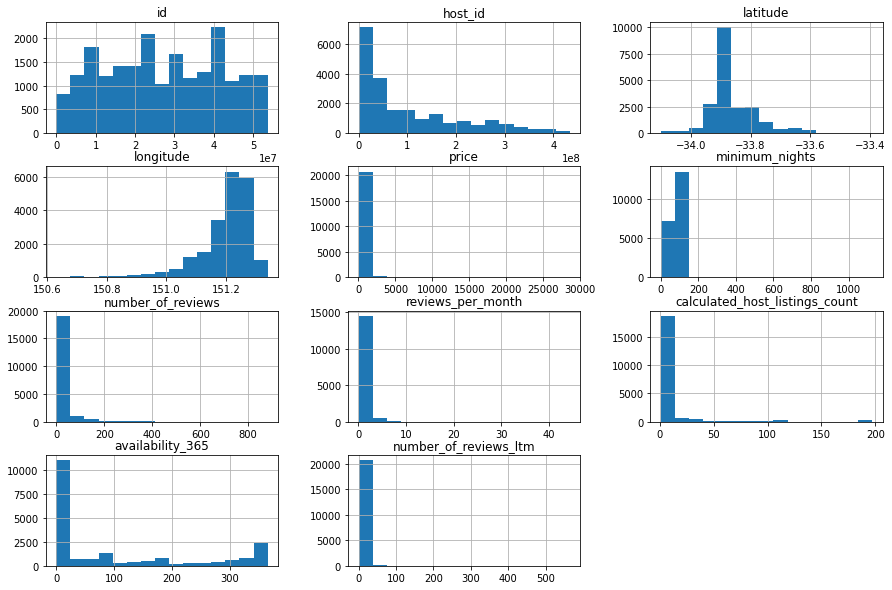

In [47]:
# plot histogram of the continuous variables
df.hist(bins=15, figsize=(15,10));

### **2.4 - Identifying Outliers**
By analysing the histograms we can see signs of outliers, for example the variables `price` and `minimum_nights` do not follow a distribution. To confirm the detection of outliers the method `describe()` will be used along with a box plot.

In [48]:
# getting statistics for continuous variables
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.087000e+04,2.087000e+04,20870.000000,20870.000000,20870.000000,20870.000000,20870.000000,15067.000000,20870.000000,20870.000000,20870.000000
mean,2.720801e+07,1.020058e+08,-33.859602,151.197995,251.241303,62.180307,17.903019,0.641634,8.097844,102.086392,2.881696
std,1.474505e+07,1.063566e+08,0.079552,0.093400,498.705037,52.747228,43.003236,1.092370,25.197216,134.262718,9.409528
min,1.115600e+04,2.174100e+04,-34.100680,150.630490,13.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.491896e+07,1.942181e+07,-33.898907,151.172612,80.000000,4.000000,0.000000,0.060000,1.000000,0.000000,0.000000
50%,2.691305e+07,5.282358e+07,-33.881240,151.214100,140.000000,90.000000,2.000000,0.200000,1.000000,7.000000,0.000000
75%,4.023977e+07,1.603918e+08,-33.824190,151.260887,250.000000,90.000000,13.000000,0.830000,3.000000,180.000000,1.000000
max,5.371000e+07,4.339022e+08,-33.392670,151.340410,28613.000000,1125.000000,881.000000,44.490000,197.000000,365.000000,565.000000


Using the above information we can confirm the presence of outliers.
* The field `price` has 75% of its values below 250 but its maximum is 28613, indicating the presence of outliers.
* The variable `minimum_nights` has a maximum value of 1125 which corresponds to over 3 years. This is quite unusual in the real estate market and indicates the presence of an outlier.

#### Boxplot for `price`

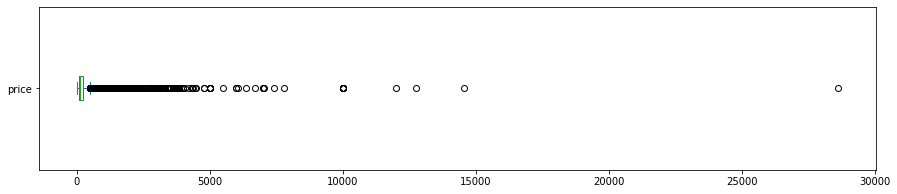

In [49]:
# create box plot
df.price.plot(kind='box', vert=False, figsize=(15,3))

#### Boxplot for `minimum_nights`

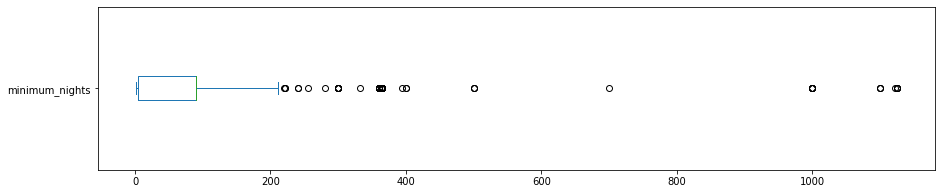

In [50]:
# create box plot
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))

#### Interquartile Range - IQR

As seen in the boxplots, outliers were indeed encountered and they will be removed to improve the quality of our analysis. To determine which data points are outliers an IQR (interquartile range) will be calculated.

* Let Q1 be the 25% percentile for a given variable
* Let Q3 be the 75% percentile for a given variable
* Then, IQR = Q3 - Q1

Hence, the data points which fall outside the range [Q1 - 1.5 * IQR, Q3 - 1.5] will be considered outliers

<center><img src="https://www.statisticshowto.com/wp-content/uploads/2012/03/iqr.jpg"/><center/>

In [51]:
# calculating iqr and the range of outliers
def iqr(column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3-q1
  return (q1 - 1.5 * iqr, q3 + 1.5 * iqr)

print(f"Range of the variable price {iqr('price')}")
print(f"Range of the variable minimum_nights {iqr('minimum_nights')}")

Range of the variable price (-175.0, 505.0)
Range of the variable minimum_nights (-125.0, 219.0)


### 2.5 - Eliminating outliers
After identifying outliers for the fields `price` and `minimum_nights`, the dataset will be cleaned and histograms will be plotted again.

In [52]:
# delete outliers
df_clean = df.copy()
df_clean.drop(df_clean.loc[df.price > 505].index, axis=0, inplace=True);
df_clean.drop(df_clean.loc[df.minimum_nights > 219].index, axis=0, inplace=True);

# pre and post cleaning dataset shape
print(df.shape)
print(df_clean.shape)

(20870, 17)
(18847, 17)


#### Histograms for the clean dataset

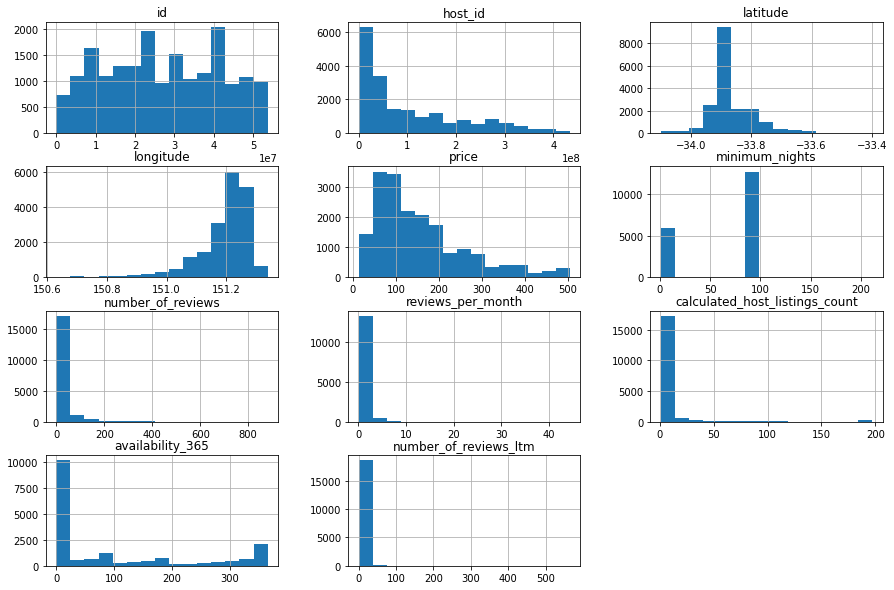

In [53]:
# create new histogram
df_clean.hist(bins=15, figsize=(15,10));

#### Box plot for `minimum_nights` after cleaning

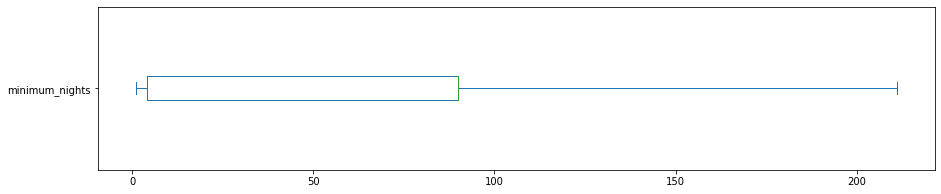

In [54]:
# create box plot
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))

We can see that we did not lose that many records in the clean dataset and now a much better analysis can be made. As seen in the histograms, the variables seem to follow a distribution, indicating outliers have been removed.

### **2.6 - Looking for correlations**
A correlation matrix will be generated and plotted in the form of a heatmap to investigate whether there are variables associated to another in this dataset. A few variables (`id`, `host_id`, `latitude`, `longitude`) will be omitted from the correlation matrix as they won't contribute to the investigation.

In [55]:
# creating a correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 
      'reviews_per_month', 'number_of_reviews_ltm', 
      'calculated_host_listings_count', 'availability_365']].corr()

corr

,price,minimum_nights,number_of_reviews,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count,availability_365
price,1.000000,-0.233775,0.024174,0.072147,0.066604,0.125003,0.087064
minimum_nights,-0.233775,1.000000,-0.338337,-0.443340,-0.397448,-0.226866,-0.355760
number_of_reviews,0.024174,-0.338337,1.000000,0.776035,0.609993,-0.021638,0.156656
reviews_per_month,0.072147,-0.443340,0.776035,1.000000,0.819971,0.030914,0.207333
number_of_reviews_ltm,0.066604,-0.397448,0.609993,0.819971,1.000000,0.043615,0.181679
calculated_host_listings_count,0.125003,-0.226866,-0.021638,0.030914,0.043615,1.000000,0.255167
availability_365,0.087064,-0.355760,0.156656,0.207333,0.181679,0.255167,1.000000


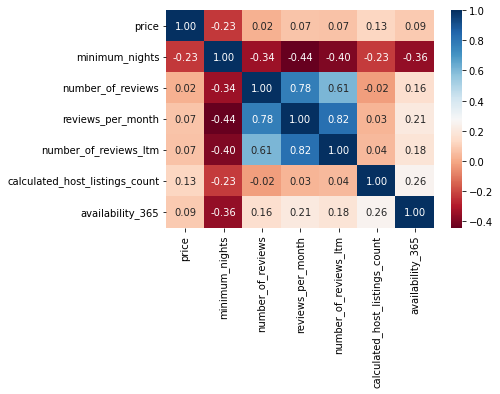

In [56]:
# plotting a heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', annot=True);

Stronger correlations can be seen between `number_of_reviews`, `reviews_per_month` and `number_of_reviews_ltm`. This is expected as these three variable measure the same quantity but in different timeframes. Other than that, there are only weak and non-significant correlations between the variables.

### **2.7 - Most popular property type on Airbnb listings at Sydney**


In [57]:
# list how many listings for each property type
df_clean.room_type.value_counts().sort_values(ascending=False)

Entire home/apt    11470
Private room        6907
Shared room          334
Hotel room           136
Name: room_type, dtype: int64

In [58]:
# percentage of property types among the listings
(df_clean.room_type.value_counts() / df_clean.shape[0] * 100) 

Entire home/apt    60.858492
Private room       36.647742
Shared room         1.772165
Hotel room          0.721600
Name: room_type, dtype: float64

Evidently, entire home or apartment has the most listings on Airbnb at Sydney (63.2%), followed by private room (34.5%). Shared room and hotel room are clearly the minority comprising 1.7% and 0.7% of the dataset respectively.

### **2.8 Average minimum length of stay in a Sydney Airbnb**
The mean and median of the variable `minimum_nights` will be calculated to investigate how long the minimum stay is for Sydney listings.

In [59]:
# calculate mean of the column minimum_nights
df_clean.minimum_nights.mean()

62.46580357616597

In [60]:
# calculate meadian of the column minimum_nights 
df_clean.minimum_nights.median()

90.0

The average minumum stay is approximately 61 days, which corresponds to a little over two months, and the median is 90 days, or 3 months. Even though the mean and median are quite far apart (indicating the data is skewed), it can be seen that, in general, Sydney Airbnb listings tend to be long term.



### **2.9 - Most expensive location in the dataset**
The mean price will be calculated for each suburb aiming to find the most expensive neighbourhood in Sydney. How many listings those locations have will also be investigated to check if their samples are too small. Further, prices will be colour-coded and plotted agaisnt a map of Sydney using its `latitude` and `longitude`.



In [61]:
# calculate mean price for the top 10 most expensive suburbs
df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)[:10]

neighbourhood
Pittwater           253.725624
Manly               224.760101
Mosman              218.090909
Warringah           191.421053
Sutherland Shire    186.977987
Woollahra           183.241477
Waverley            179.977921
Leichhardt          177.444934
North Sydney        166.164117
Hunters Hill        161.782609
Name: price, dtype: float64

In [62]:
# how many listings each of the top 10 expensive locations have
expensive = df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False).index[:10]
df_clean.groupby('neighbourhood').size()[expensive]

neighbourhood
Pittwater            441
Manly                792
Mosman               187
Warringah            836
Sutherland Shire     318
Woollahra            704
Waverley            2491
Leichhardt           454
North Sydney         719
Hunters Hill          23
dtype: int64

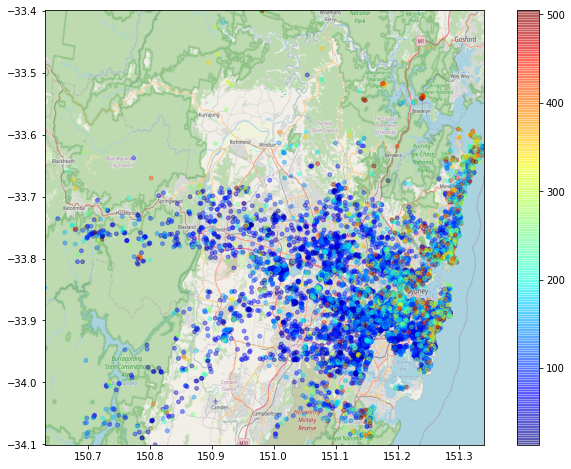

In [63]:
# plotting a map of sydney with airbnb prices
borderbox = (df_clean.longitude.min(), df_clean.longitude.max(), df_clean.latitude.min(), df_clean.latitude.max())
map = plt.imread('map.png')

fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(map, zorder=0, extent=borderbox)
scatter = ax.scatter(x=df_clean.longitude, y=df_clean.latitude,  alpha=0.4, c=df_clean.price, cmap=plt.get_cmap('jet'), s=15)
plt.colorbar(scatter)
plt.show();

As seen in the map, there is a larger concentration of orange/red data points near the coast and in the proximities of a region called Sydney's Northern Beaches. Further, 7 out of the 10 suburbs found in the top 10 previosuly shown are also coastal areas. This suggests locations closer to the shore, and especially the Northern Beaches, are the most expensive places to get an Airbnb at Sydney.

## 3.0 - Conclusion


To conclude, a shallow analysis was done but outliers could already be encountered. Further, the most expensive locations have a small sample size compared to the size of the dataset, hence they may not be representative.

The mean of `minimum_nights` had a large difference to its median. This suggests the distribution of that variable is skewed, which could cause problems when applying statistical models. 

Finally, it's important to keep in mind only a summary dataset was used. For a more in-dept exploratory analysis it is recommended to use the full-length found at the same website.
